In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [2]:
df= pd.read_csv('D:/data/HR_capstone_dataset.csv',header=0)

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
##lets check for duplicate values
df.duplicated().sum()

3008

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(11991, 10)

In [9]:
##lets check for null values
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [10]:
##lets rename some of the columns for better standarization 
df = df.rename(columns = {'time_spend_company' : 'emp_tenure',
                          'Work_accident' : 'work_accident',
                          'Department' : 'department',
                          'average_montly_hours' : 'average_monthly_hours'})

In [11]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'emp_tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [12]:
df['emp_tenure'].describe()

count    11991.000000
mean         3.364857
std          1.330240
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: emp_tenure, dtype: float64

The average tenure of an employee is around 3 to 4 years 

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

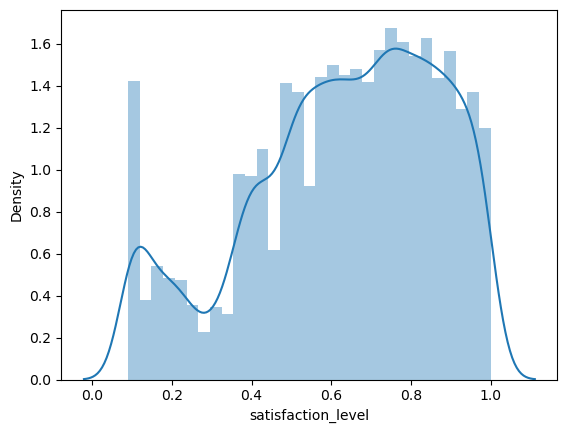

In [13]:
sns.distplot(df['satisfaction_level'])

In [14]:
##lets review department wise employee distribution
df['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

In [15]:
##lets review the department wise satisfaction level
df.groupby('department')['satisfaction_level'].mean()

department
IT             0.634016
RandD          0.627176
accounting     0.607939
hr             0.621947
management     0.631995
marketing      0.634770
product_mng    0.629825
sales          0.631349
support        0.634822
technical      0.627937
Name: satisfaction_level, dtype: float64

From the above result we can see that there is not much difference between the satisfaction level of employees across departments.

In [16]:
##lets see how many employees left the organisation
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

 from the above result we have oberved that 3571 employees have left the organisation

In [17]:
## lets review the department wise employee turnover
df.groupby('department')['left'].value_counts()

department   left
IT           0        818
             1        158
RandD        0        609
             1         85
accounting   0        512
             1        109
hr           0        488
             1        113
management   0        384
             1         52
marketing    0        561
             1        112
product_mng  0        576
             1        110
sales        0       2689
             1        550
support      0       1509
             1        312
technical    0       1854
             1        390
Name: left, dtype: int64

In [18]:
##lets check department wise employee turnover 
df['turnover'] = (df['left'] == 1).astype('int')
dept_t= df.groupby('department')['turnover'].mean() * 100
print(dept_t)
                                    

department
IT             16.188525
RandD          12.247839
accounting     17.552335
hr             18.801997
management     11.926606
marketing      16.641902
product_mng    16.034985
sales          16.980550
support        17.133443
technical      17.379679
Name: turnover, dtype: float64


                From the above result we can see that HR department has high turnover rate

In [19]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,emp_tenure,work_accident,left,promotion_last_5years,department,salary,turnover
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [20]:
del df['turnover']

In [21]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,emp_tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

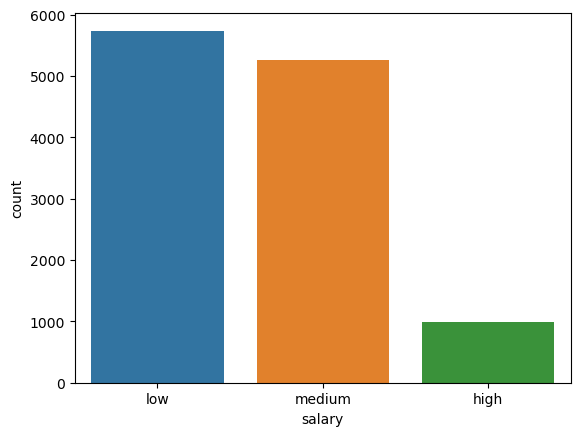

In [22]:
sns.countplot(df['salary'])

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_accident', ylabel='count'>

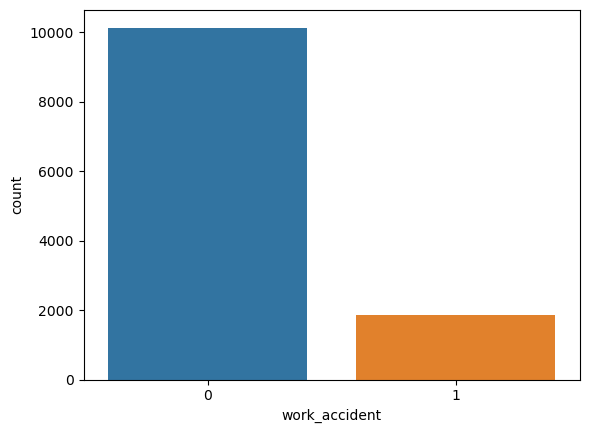

In [23]:
sns.countplot(df['work_accident'])

In [24]:
df.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


The mean and meadian of the satisfaction level of the employees left are low which is expected.

In [25]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,emp_tenure,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
emp_tenure,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


From the above correlation analysis we can conclude that variables like number of projects and employess have negative coorelation which indicates that as these variables increases the satisfaction level decreases.

Since our outcome variables 'left' is an categorical variable, we will use logistic regression 

In [26]:
##lets create dummy variables for necessary categorical variables

df = pd.get_dummies(data=df, prefix=['salary', 'dept'], columns=['salary', 'department'])


In [27]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,emp_tenure,work_accident,left,promotion_last_5years,salary_high,salary_low,...,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [28]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,emp_tenure,work_accident,left,promotion_last_5years,salary_high,salary_low,...,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,...,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,0.082562,0.478692,...,0.081394,0.057877,0.051789,0.050121,0.036361,0.056125,0.057210,0.270119,0.151864,0.18714
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.275230,0.499567,...,0.273451,0.233520,0.221610,0.218204,0.187194,0.230173,0.232252,0.444040,0.358904,0.39004
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='average_monthly_hours'>

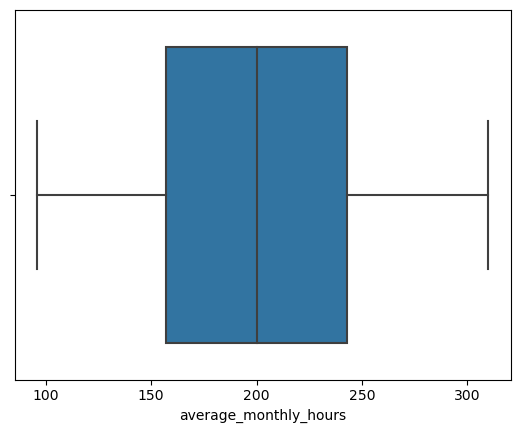

In [29]:
sns.boxplot(df['average_monthly_hours'])

                                              Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [31]:
X = df.loc[:,df.columns !='left']
y = df['left']

In [32]:
print(X.shape)
print(y.shape)

(11991, 20)
(11991,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9592, 20) (2399, 20) (9592,) (2399,)


In [35]:
clf_lr = LogisticRegression(random_state=42, max_iter=500)

In [36]:
clf_lr.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=42)

In [37]:
y_pred = clf_lr.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
clf_lr.coef_

array([[-3.86907657e+00,  6.52842845e-01, -2.60025234e-01,
         3.85830941e-03,  3.04543967e-01, -1.32395047e+00,
        -9.58581259e-01, -1.40395562e+00,  5.58694110e-01,
         9.62909611e-02, -8.68951281e-02, -4.41877260e-01,
        -5.57188869e-02,  1.25061296e-01, -3.07498258e-01,
         5.77689278e-02, -3.90631881e-02, -2.36442986e-02,
         1.40968097e-02,  8.79943839e-03]])

In [39]:
clf_lr.intercept_

array([-0.88421989])

In [40]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,y_pred)
cn

array([[1929,   69],
       [ 332,   69]], dtype=int64)

In [41]:
df['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report

In [43]:
precision_score(y_test,y_pred)

0.5

In [44]:
recall_score(y_test,y_pred)

0.17206982543640897

In [45]:
accuracy_score(y_test,y_pred)

0.8328470195914964

In [46]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.85      0.97      0.91      1998
    Predicted would leave       0.50      0.17      0.26       401

                 accuracy                           0.83      2399
                macro avg       0.68      0.57      0.58      2399
             weighted avg       0.79      0.83      0.80      2399



In [61]:
from sklearn.metrics import roc_curve, auc

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [63]:
roc_auc = auc(fpr, tpr)

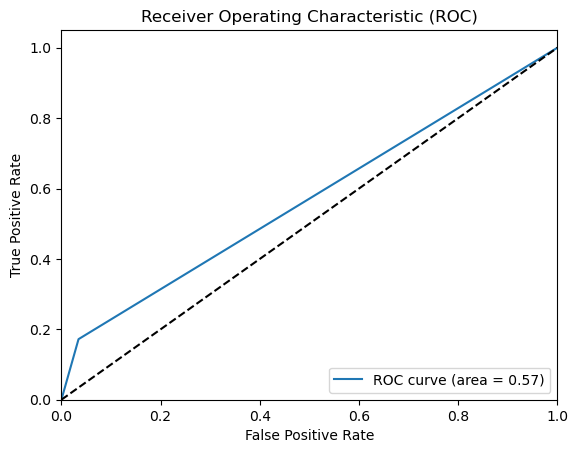

In [64]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [72]:
from sklearn.metrics import precision_recall_curve, auc

In [73]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

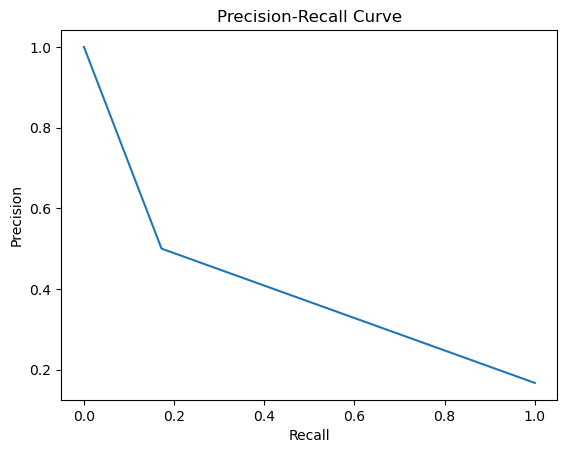

In [74]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [75]:
auc_pr = auc(recall, precision)

In [76]:
print("AUC-PR: ", auc_pr)

AUC-PR:  0.4052304108424229


The accuracy score represents the proportion of correct predictions out of the total number of samples. In our case the model has 83% accuracy and an AUC of 0.57 suggests that the discriminatory power of our classifier is slightly better than random guessing, but it may not be very strong.

                                        Linear Discriminant analysis

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [52]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [53]:
y_pred_lda = clf_lda.predict(X_test)

In [60]:
y_pred_lda

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
confusion_matrix(y_test,y_pred_lda)

array([[1906,   92],
       [ 310,   91]], dtype=int64)

In [56]:
accuracy_score(y_test,y_pred_lda)

0.8324301792413505

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lda)

In [66]:
roc_auc = auc(fpr, tpr)

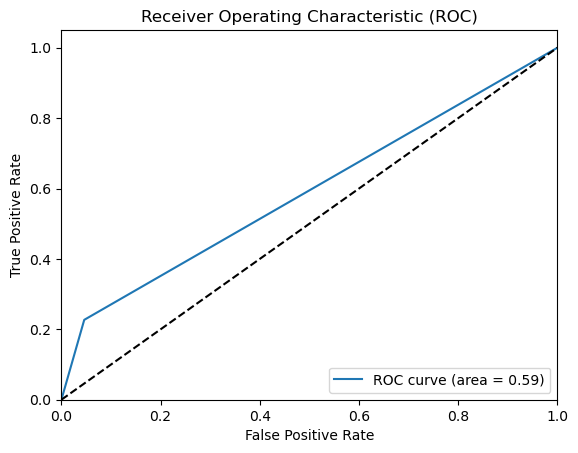

In [67]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

                    The AUC of 0.59 by using LDA method is  slightly better